<a href="https://colab.research.google.com/github/nebyu08/torch/blob/master/torch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [76]:
torch.__version__

'2.1.0+cu121'

# Data processing

In [77]:
temp=torch.randn(1,34,3)
print(temp.shape)
print(temp.unsqueeze(dim=1).shape)

torch.Size([1, 34, 3])
torch.Size([1, 1, 34, 3])


In [78]:
weights=0.7
bias=0.3

#create data
start=0
end=1
step=0.02

x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weights*x + bias
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [79]:
#create a train/test split
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]
print(len(x_train))
print(len(x_test))

40
10


# data visualization

In [80]:
def plot_predictions(x_train=x_train,y_train=y_train,
                     x_test=x_test,y_test=y_test,
                     predictions=None):
  '''this plots the training,testing and prediction of the model'''
  plt.figure(figsize=(10,7))

  #visualizing the training data
  plt.scatter(x_train,y_train,c="b",s=4,label="training data");
  #visualizing the testing set of the data
  plt.scatter(x_test,y_test,c="g",s=6,label="testing label");
  if (predictions is not None):

    '''displays the difference between actual and predicted'''

    plt.scatter(y_test,predictions,c="r",label="predictions",s=4);
  plt.legend(prop={"size":14})
  plt.show()

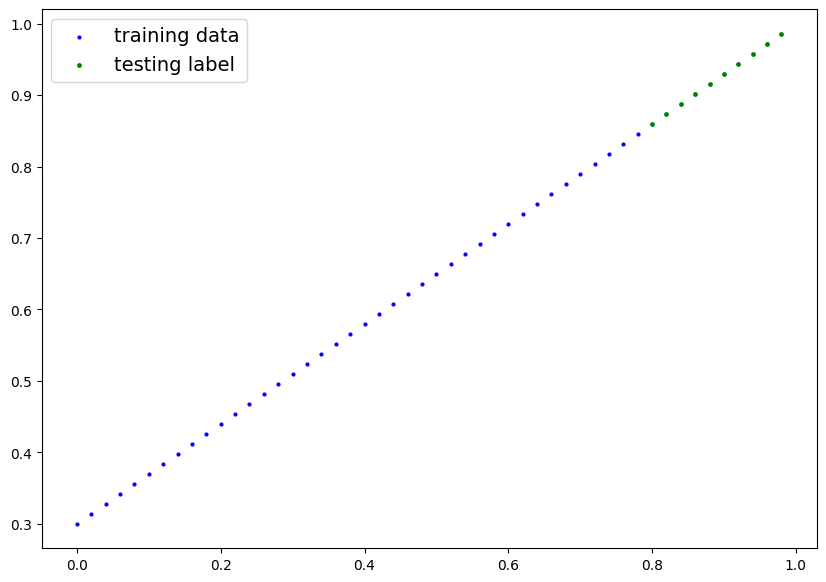

In [81]:
plot_predictions(x_train,y_train,x_test,y_test)

# creating our first torch model

In [82]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                               dtype=torch.float32),
                              requires_grad=True)

    self.bias=nn.Parameter(torch.randn(1,
                            dtype=torch.float32),requires_grad=True)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return (x*self.weights+self.bias)


In [83]:
x=torch.tensor([12,23,34,21,2])
x.dtype

torch.int64

In [84]:
#create a random seed
torch.manual_seed(42)
model=LinearRegressionModel()
model

LinearRegressionModel()

In [85]:
#lets look at the models parameters
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [86]:
# lets see the values of the model
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [87]:
weights,bias

(0.7, 0.3)

In [88]:
# lets see what the model predicts know with our training
with torch.inference_mode():
  y_preds=model(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [89]:
y_preds==y_test

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

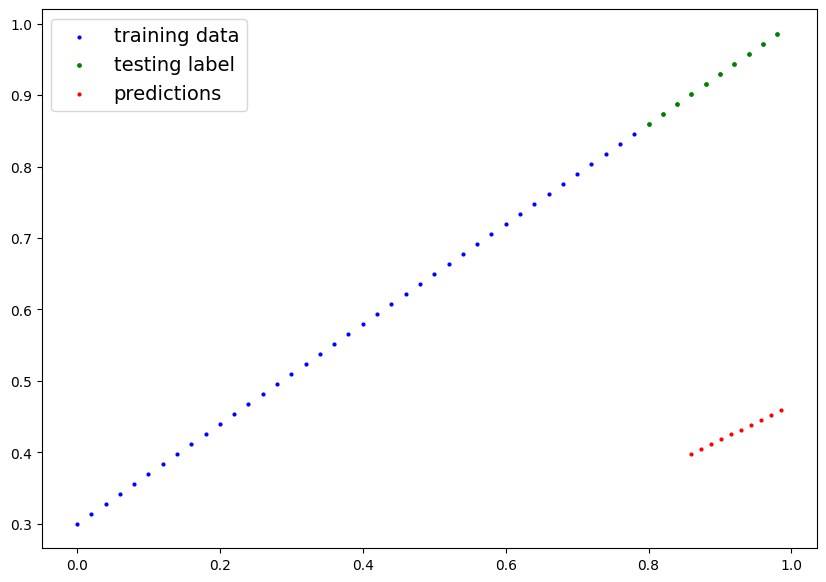

In [90]:
#visualizing the difference between actual and predicted labels
plot_predictions(predictions=y_preds)

# setup a loss function and optimizer

In [91]:
#initializing loss obj
loss_fn=torch.nn.L1Loss()

#initializing optimizer obj
optim=torch.optim.SGD(
    params=model.parameters(),
    lr=0.001
)

# building a training and a testing loop

In [92]:
torch.manual_seed(42)
# lets make the training loop
epochs=200

#create empty loss
train_loss_value=[]
test_loss_value=[]
epoch_count=[]


for epoch in range(epochs):
  #lets setup the model for training
  model.train()

  #forward pass
  y_pred=model.forward(x_train)

  #calculate the loss........this is the gradient decent
  loss=loss_fn(y_pred,y_train)
  print(f"loss is {loss}")

  #lets do the optimizer
  optim.zero_grad()

  #lets do the backpropagation...calculating the derivatives of each parameter
  loss.backward()

  #lets update the weights/parameters
  optim.step()

  #lets make the model evaluation easy
  model.eval()   #this turns off the gradient tracking,drop out/batch normalization
  with torch.inference_mode():
    y_test_pred=model.forward(x_test) #this is the forward pass in inference mode
    #test loss
    test_loss=loss_fn(y_test_pred,y_test)

  if epoch%10==0:
    epoch_count.append(epoch)
    train_loss_value.append(loss.detach().numpy())
    test_loss_value.append(test_loss.detach().numpy())
    print(f"epoch {epoch} : loss {loss} :test_loss {test_loss}")

#print(model.state_dict)



loss is 0.31288138031959534
epoch 0 : loss 0.31288138031959534 :test_loss 0.4931890368461609
loss is 0.3117292523384094
loss is 0.3105771541595459
loss is 0.3094250559806824
loss is 0.30827295780181885
loss is 0.3071208596229553
loss is 0.3059687614440918
loss is 0.3048166334629059
loss is 0.30366456508636475
loss is 0.3025124669075012
loss is 0.3013603389263153
epoch 10 : loss 0.3013603389263153 :test_loss 0.4797181189060211
loss is 0.30020827054977417
loss is 0.29905614256858826
loss is 0.2979040741920471
loss is 0.2967519462108612
loss is 0.29559987783432007
loss is 0.29444774985313416
loss is 0.293295681476593
loss is 0.2921435832977295
loss is 0.2909914553165436
loss is 0.28983938694000244
epoch 20 : loss 0.28983938694000244 :test_loss 0.4662471413612366
loss is 0.28868725895881653
loss is 0.287535160779953
loss is 0.2863830626010895
loss is 0.28523099422454834
loss is 0.2840788662433624
loss is 0.2829267382621765
loss is 0.281774640083313
loss is 0.28062254190444946
loss is 0.279

In [93]:
model.state_dict()

OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3250]))])

In [94]:
weights,bias

(0.7, 0.3)

# lets see the difference before and after training

In [95]:
len(epoch_count),len(test_loss_value)

(20, 20)

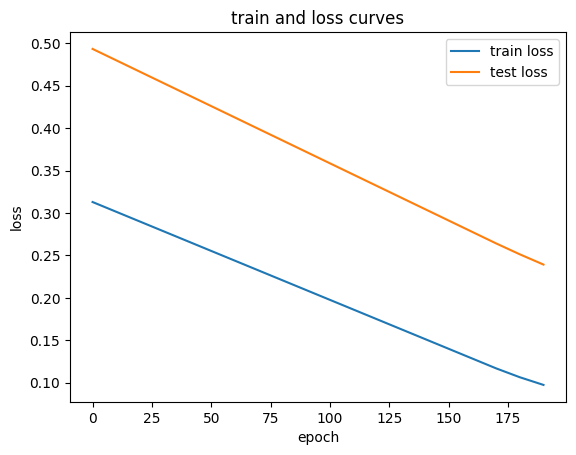

In [96]:
#lets visulaize the process of training
plt.plot(epoch_count,train_loss_value,label="train loss")
plt.plot(epoch_count,test_loss_value,label="test loss")
plt.title("train and loss curves")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend();

In [97]:
# # lets visulaize the process of training
# epoch_count_tensor = torch.tensor(epoch_count).detach()
# train_loss_value_tensor = torch.tensor(train_loss_value).detach()
# test_loss_value_tensor = torch.tensor(test_loss_value).detach()

# plt.plot(torch.tensor(epoch_count), train_loss_value, label="train loss")
# plt.plot(torch.tensor(epoch_count), test_loss_value, label="test loss")
# plt.xlabel("epoch")
# plt.ylabel("loss")
# plt.legend();

In [98]:
with torch.inference_mode():
  y_pred_new=model(x_test)

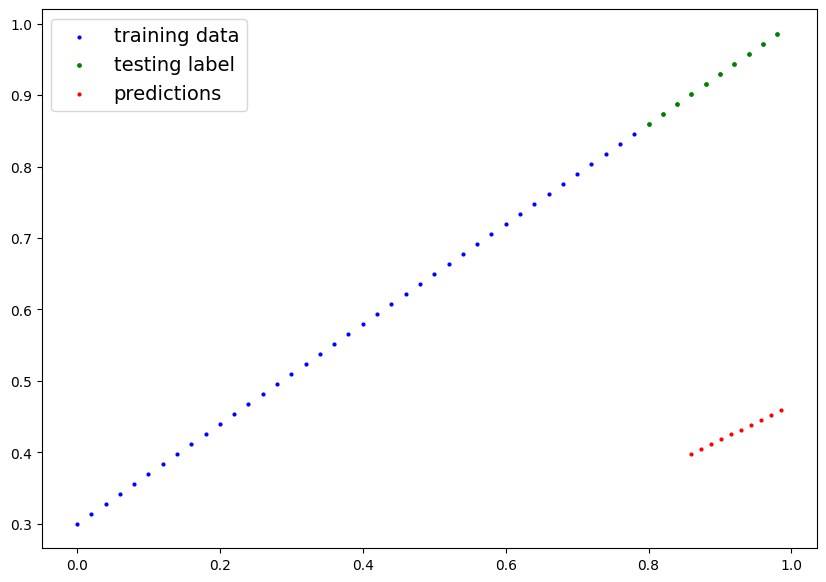

In [99]:
#before trainign the model
plot_predictions(predictions=y_preds)

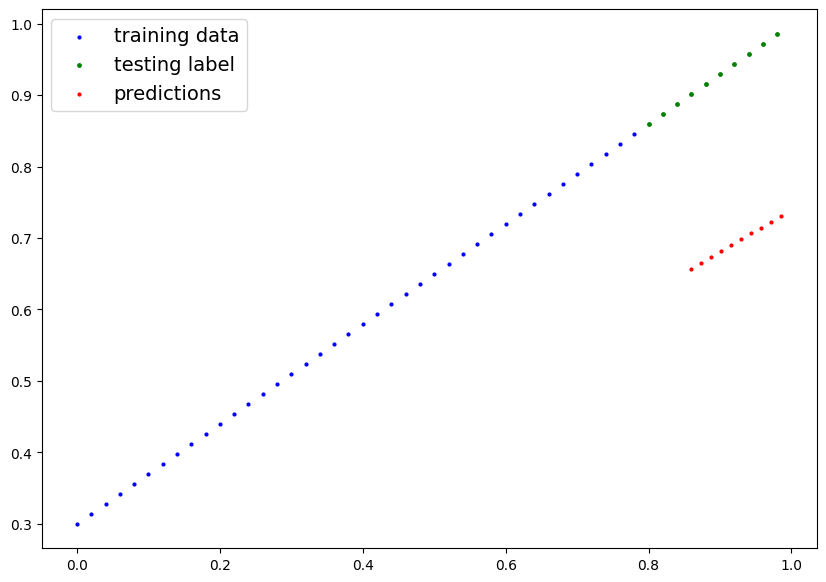

In [100]:
#after training the model
plot_predictions(predictions=y_pred_new)

# saving model trained in pytorch

In [101]:
model.state_dict()

OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3250]))])

In [102]:
list(model.state_dict())

['weights', 'bias']

In [103]:
# lets save the model into a directory
from pathlib import Path

#create model direcotry
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)

#create a save path
model_name="01_torch_model.pth"
model_save_path=model_path/model_name

#save the model into our directory
torch.save(model.state_dict(),model_save_path)

In [104]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1538 Jan 30 14:45 01_torch_model.pth


### lets load the model

In [105]:
model.state_dict()

OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3250]))])

In [106]:
#loading model
load_model=LinearRegressionModel()
#know lets assign the weigts to the model
load_model.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [107]:
load_model.state_dict()

OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3250]))])

In [111]:
#lets evaluete the loaded model
load_model.eval()
with torch.inference_mode():
  loaded_model_preds=load_model(x_test)
print(loaded_model_preds)

tensor([[0.6566],
        [0.6649],
        [0.6732],
        [0.6815],
        [0.6898],
        [0.6981],
        [0.7064],
        [0.7147],
        [0.7230],
        [0.7313]])


In [112]:
#lets compare between the saved model and loaded model
model.eval()
with torch.inference_mode():
  y_pred=load_model(x_test)

In [113]:
print(loaded_model_preds==y_pred)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])
